# K-means

In [11]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
# Data Pre-processing
# Importing Dataset
dataset = pd.read_csv("C:/Users/Mishaal/Desktop/shoppingcenter.csv")

In [13]:
X = dataset.iloc[:, [3,4]].values
dataset

,Customer ID,Gender,Age,Annual Income in K$,Spending Points (1-100)
0,15101,Male,19,15,39
1,15102,Male,21,15,81
2,15103,Female,20,16,6
3,15104,Female,23,16,77
4,15105,Female,31,17,40
5,15106,Female,22,17,76
6,15107,Female,35,18,6
7,15108,Female,23,18,94
8,15109,Male,64,19,3
9,15110,Female,30,19,72


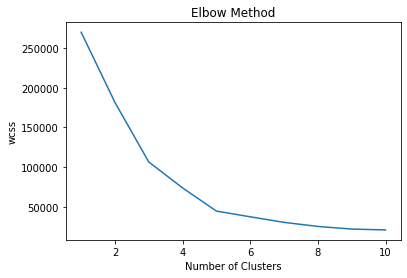

In [4]:
# Elbow Method
#n_init= No. of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.
#Inertia can be recognized as a measure of how internally coherent clusters are or within-cluster sum-of-squares(WCSS)
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0) 
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()  #optimal value of k=5

In [5]:
# fitting kmeans to dataset
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, random_state=0)
Y_kmeans = kmeans.fit_predict(X) #predicts which data point belongs to which cluster

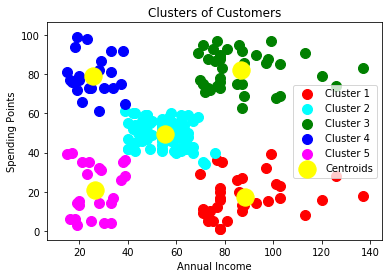

In [6]:
# Visualising the clusters
plt.scatter(X[Y_kmeans==0, 0], X[Y_kmeans==0, 1], s=100, c='red', label= 'Cluster 1') #[cluster no.,X].[cluster no.,Y], size,label
plt.scatter(X[Y_kmeans==1, 0], X[Y_kmeans==1, 1], s=100, c='cyan', label= 'Cluster 2')
plt.scatter(X[Y_kmeans==2, 0], X[Y_kmeans==2, 1], s=100, c='green', label= 'Cluster 3')
plt.scatter(X[Y_kmeans==3, 0], X[Y_kmeans==3, 1], s=100, c='blue', label= 'Cluster 4')
plt.scatter(X[Y_kmeans==4, 0], X[Y_kmeans==4, 1], s=100, c='magenta', label= 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids' )
plt.title('Clusters of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Points')
plt.legend()
plt.show()

# Hierarchical Cluster Analysis

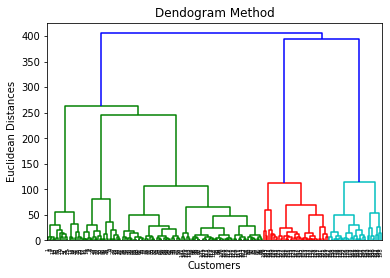

In [14]:
#Data pre-processing same as before as we our working on the same data
# Dendogram Method to find optimal no. of k
import scipy.cluster.hierarchy as sch
d_gram = sch.dendrogram(sch.linkage(X, method='ward')) # linkage is hierarchical alogrithm, ward method tries to minimise variance between each cluster where as in k means we try to minimise WCSS
plt.title('Dendogram Method')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
#plt.savefig('img_1.png', dpi=500)
plt.show()

In [15]:
# Fitting Hierarchical Cluster Analysis to dataset
# With the help of dentogram method we know in this case k=5 
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage='ward') #affinity method to perform linkage
Y_hc = hc.fit_predict(X)

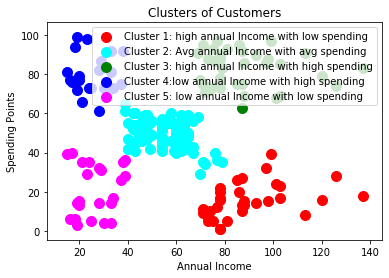

In [16]:
# Visualising the clusters
plt.scatter(X[Y_hc==0, 0], X[Y_hc==0, 1], s=100, c='red', label= 'Cluster 1: high annual Income with low spending')
plt.scatter(X[Y_hc==1, 0], X[Y_hc==1, 1], s=100, c='cyan', label= 'Cluster 2: Avg annual Income with avg spending')
plt.scatter(X[Y_hc==2, 0], X[Y_hc==2, 1], s=100, c='green', label= 'Cluster 3: high annual Income with high spending')
plt.scatter(X[Y_hc==3, 0], X[Y_hc==3, 1], s=100, c='blue', label= 'Cluster 4:low annual Income with high spending ')
plt.scatter(X[Y_hc==4, 0], X[Y_hc==4, 1], s=100, c='magenta', label= 'Cluster 5: low annual Income with low spending')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Points')
plt.legend()
plt.show()

Cluster 3 has the highest Annual Income and highest spending points, this should be our target customers